<a href="https://colab.research.google.com/github/gitgubbenito/PracticalApplicationAssignment2_11/blob/main/prompt_2_Argenis-Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?...

![](https://github.com/gitgubbenito/AI_ML/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**I will understand Data Quality:**
 the available data

*   Duplicates
*   Missing Values
*   Outliers
*   Drop Redundant Features
*   Drop Redundant Features
*   Check for Cardinality
*   Check for Cardinality
    Key Identifying

*   List item
*   List item


    Check for wrong data type
    Data Columns in the dataset












In [1]:
# Load vehicles.csv

import pandas as pd
# Load the vehicles.csv data using pandas
df = pd.read_csv('vehicles.csv')

In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Calculate the percentage of missing values per column
missing_values = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values for each column
for column, missing_percentage in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_percentage:.2f}%")

In [5]:
df.describe()

,id,price,year,odometer
count,4.063090e+05,4.063080e+05,405196.000000,4.021470e+05
mean,7.311502e+09,7.804802e+04,2011.238655,9.822975e+04
std,4.459554e+06,1.248687e+07,9.467078,2.161315e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308183e+09,5.900000e+03,2008.000000,3.772500e+04
50%,7.312703e+09,1.390000e+04,2013.000000,8.566200e+04
75%,7.315245e+09,2.599900e+04,2017.000000,1.335380e+05
max,7.317095e+09,3.736929e+09,2022.000000,1.000000e+07


In [3]:
# prompt: apply TargetEncoder  to the dataset and show me the resulting values

from category_encoders import TargetEncoder

# Create a TargetEncoder object
te = TargetEncoder()

# Fit the encoder to the data
te.fit(df.drop('price', axis=1), df['price'])

# Transform the data
df_encoded = te.transform(df.drop('price', axis=1))

# Print the encoded data
print(df_encoded.head())


           id        region  year  manufacturer         model      condition  \
0  7222695916  25288.953083   NaN   34277.64047  1.258139e+06  101563.500369   
1  7218891961  17025.174327   NaN   34277.64047  1.258139e+06  101563.500369   
2  7221797935  25285.759216   NaN   34277.64047  1.258139e+06  101563.500369   
3  7222270760  15248.206897   NaN   34277.64047  1.258139e+06  101563.500369   
4  7210384030  17486.631858   NaN   34277.64047  1.258139e+06  101563.500369   

      cylinders          fuel  odometer  title_status  transmission  \
0  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
1  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
2  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
3  91184.424882  17682.548456       NaN  14966.420956  14776.371753   
4  91184.424882  17682.548456       NaN  14966.420956  14776.371753   

             VIN          drive          size           type    paint_color  \
0  171167.482

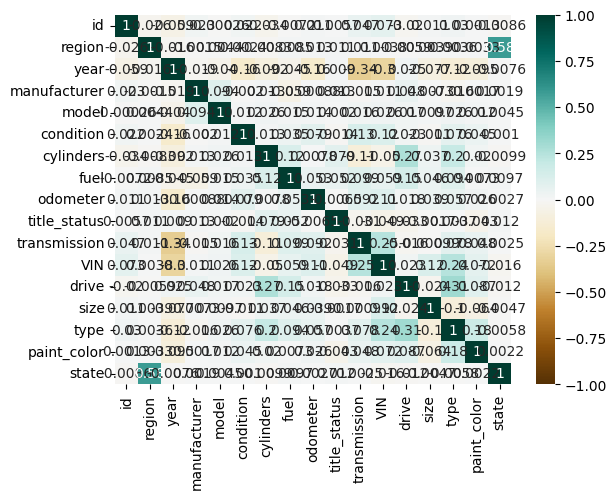

In [8]:
# prompt: create a cirrelation matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df_encoded.corr()

# Create a heatmap
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Display the heatmap
plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.28%
Column: manufacturer, Missing values: 4.13%
Column: model, Missing values: 1.24%
Column: condition, Missing values: 40.79%
Column: cylinders, Missing values: 41.62%
Column: fuel, Missing values: 0.71%
Column: odometer, Missing values: 1.03%
Column: title_status, Missing values: 1.93%
Column: transmission, Missing values: 0.60%
Column: VIN, Missing values: 37.73%
Column: drive, Missing values: 30.59%
Column: size, Missing values: 71.77%
Column: type, Missing values: 21.75%
Column: paint_color, Missing values: 30.50%
Column: state, Missing values: 0.00%


In [ ]:
# prompt:  print the datatype for each column

print(df.dtypes)


id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [9]:
missing_values = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values for each column
for column, missing_percentage in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_percentage:.2f}%")

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.28%
Column: manufacturer, Missing values: 4.13%
Column: model, Missing values: 1.24%
Column: condition, Missing values: 40.79%
Column: cylinders, Missing values: 41.62%
Column: fuel, Missing values: 0.71%
Column: odometer, Missing values: 1.03%
Column: title_status, Missing values: 1.93%
Column: transmission, Missing values: 0.60%
Column: VIN, Missing values: 37.73%
Column: drive, Missing values: 30.59%
Column: size, Missing values: 71.77%
Column: type, Missing values: 21.75%
Column: paint_color, Missing values: 30.50%
Column: state, Missing values: 0.00%


SyntaxError: invalid syntax (<ipython-input-16-5f9a01785fa0>, line 1)

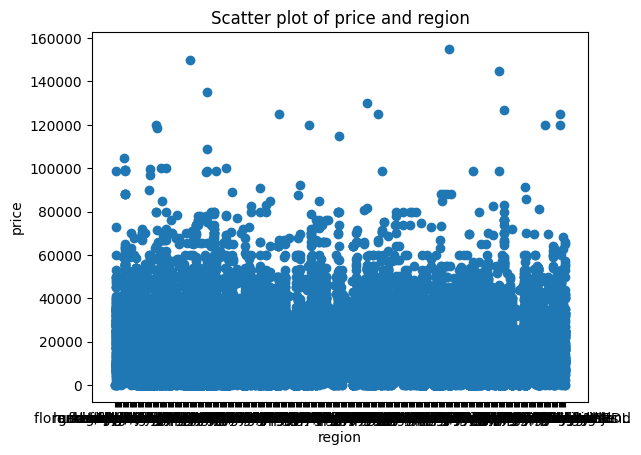

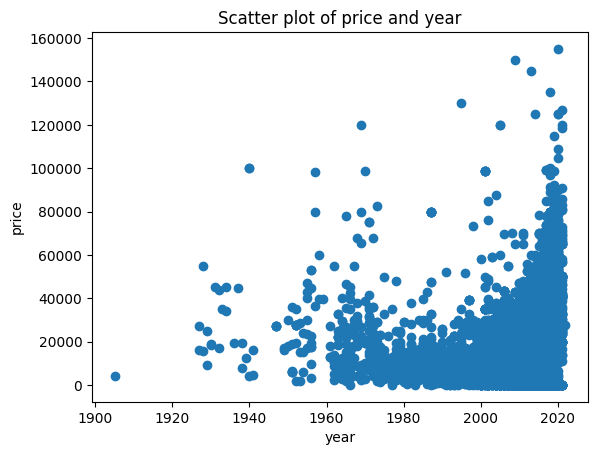

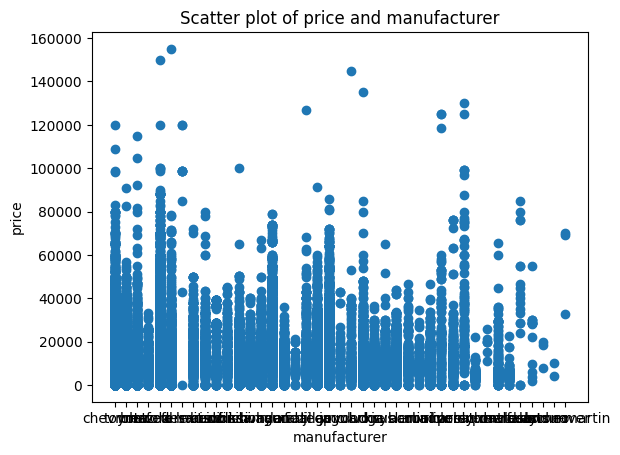

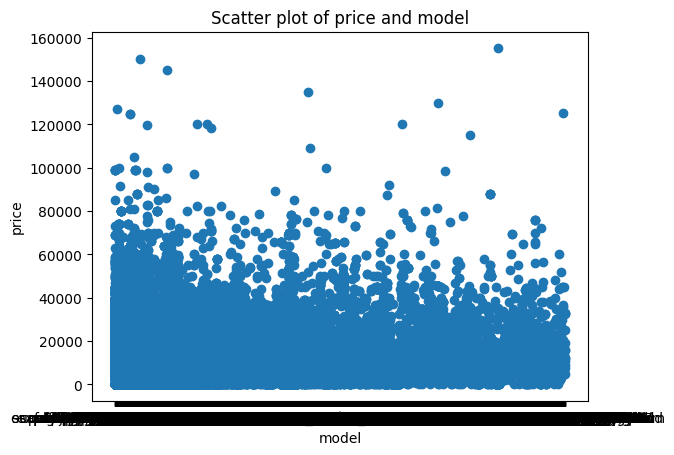

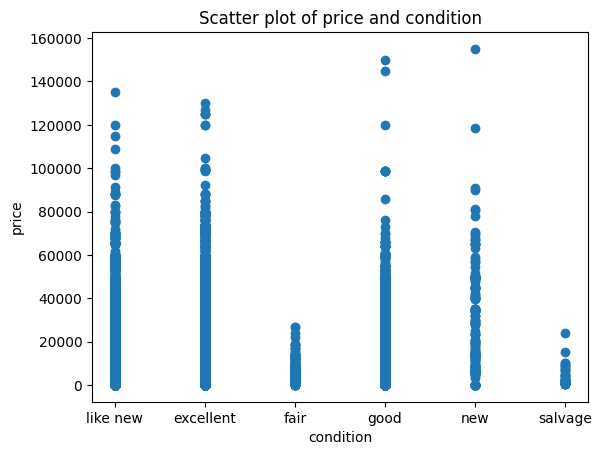

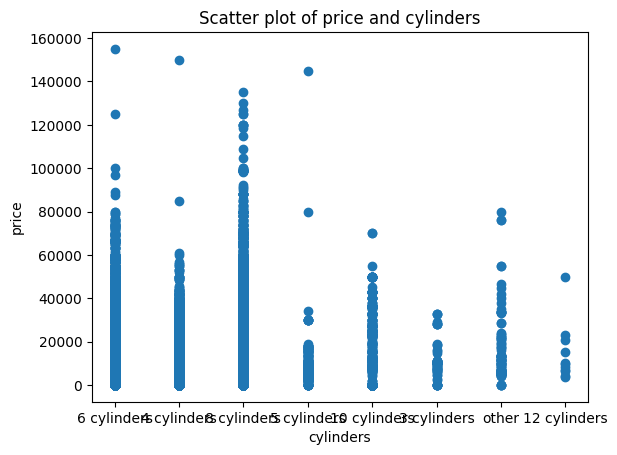

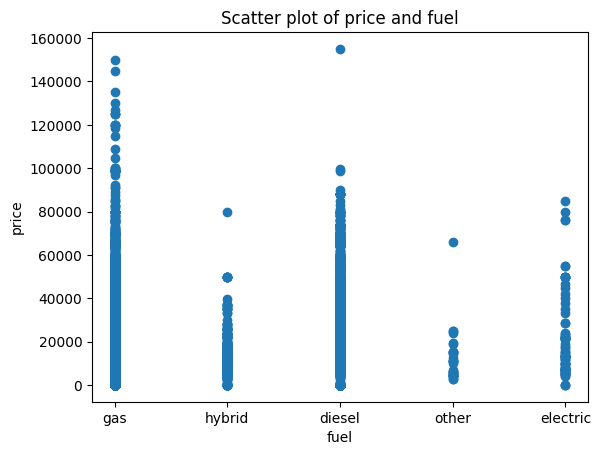

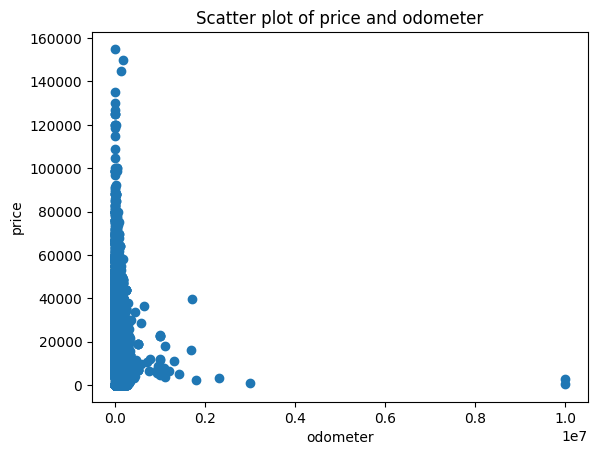

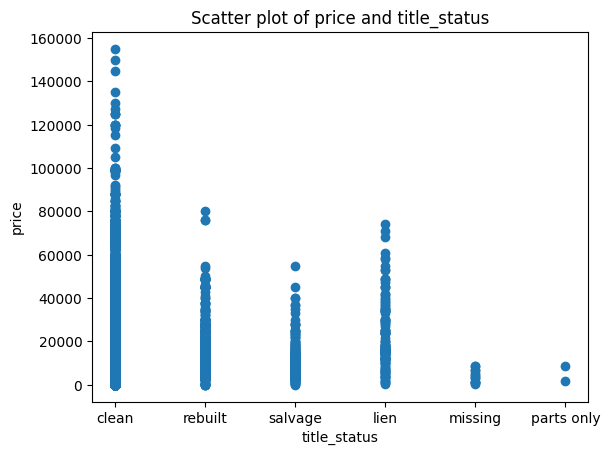

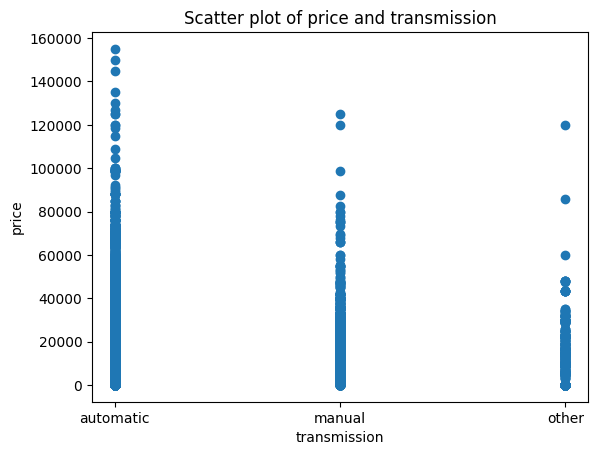

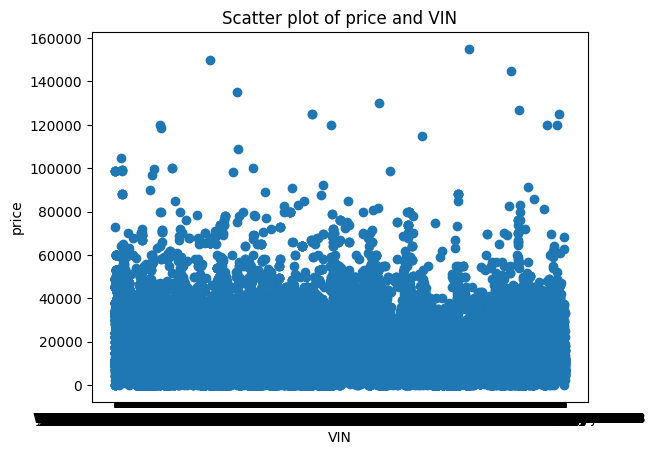

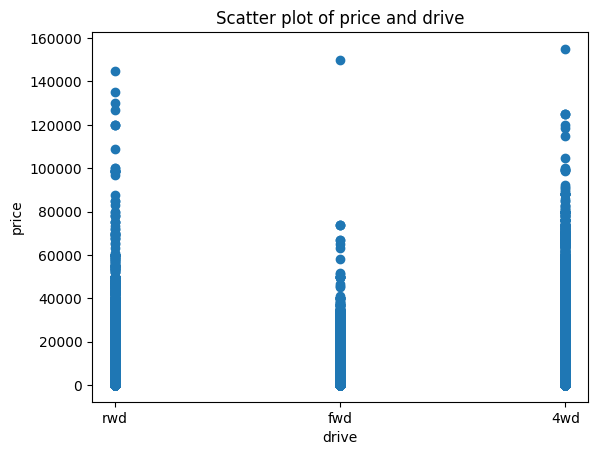

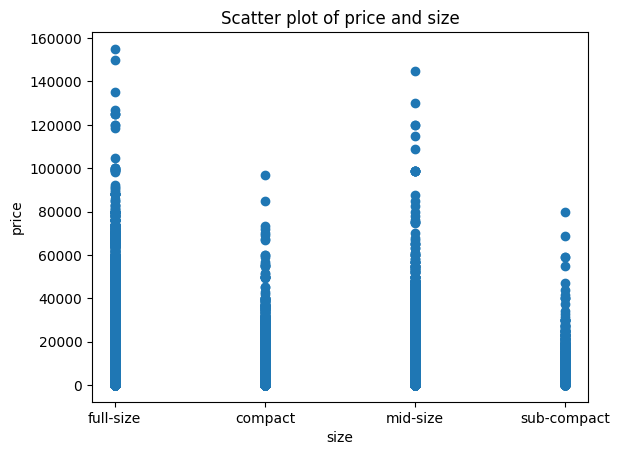

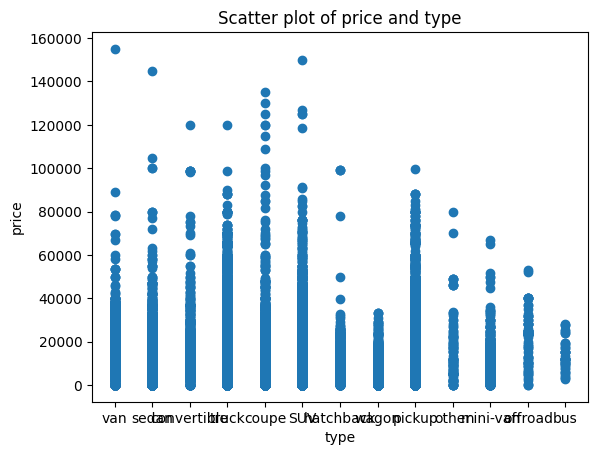

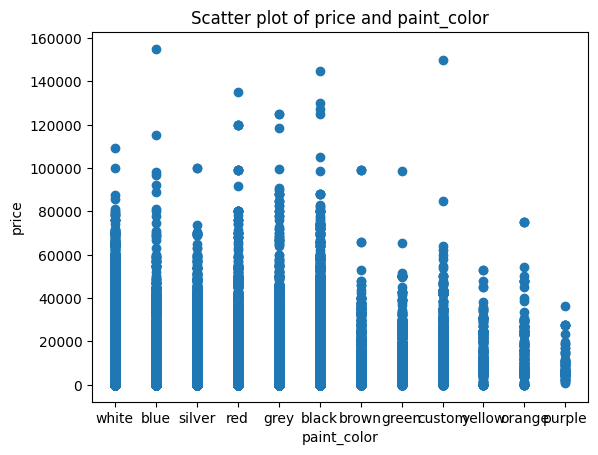

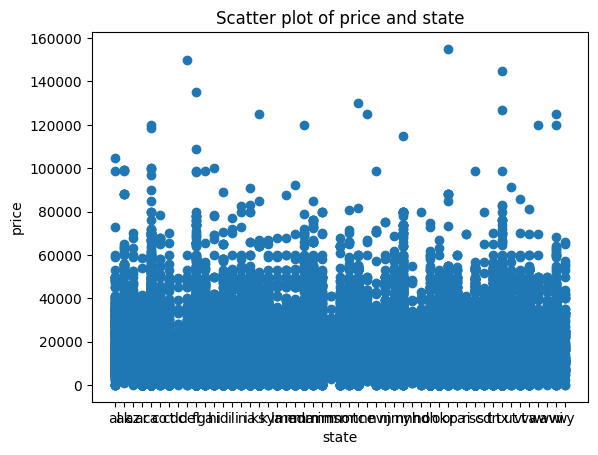

In [17]:
# prompt: scatter plot price and the rest of feature in each feature in it owns grafic

import matplotlib.pyplot as plt

for column in df.columns:
  if column != 'price':
    plt.figure()
    plt.scatter(df[column], df['price'])
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(f'Scatter plot of price and {column}')
    plt.show()


In [10]:
df.shape

df.drop_duplicates
df.dropna(inplace=True)
missing_values = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values for each column
for column, missing_percentage in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_percentage:.2f}%")

Column: id, Missing values: 0.00%
Column: region, Missing values: 0.00%
Column: price, Missing values: 0.00%
Column: year, Missing values: 0.00%
Column: manufacturer, Missing values: 0.00%
Column: model, Missing values: 0.00%
Column: condition, Missing values: 0.00%
Column: cylinders, Missing values: 0.00%
Column: fuel, Missing values: 0.00%
Column: odometer, Missing values: 0.00%
Column: title_status, Missing values: 0.00%
Column: transmission, Missing values: 0.00%
Column: VIN, Missing values: 0.00%
Column: drive, Missing values: 0.00%
Column: size, Missing values: 0.00%
Column: type, Missing values: 0.00%
Column: paint_color, Missing values: 0.00%
Column: state, Missing values: 0.00%


In [14]:
df.describe()

,id,price,year,odometer
count,3.486800e+04,34868.000000,34868.000000,3.486800e+04
mean,7.311508e+09,15837.446771,2011.176867,1.073991e+05
std,4.299751e+06,13460.056823,7.162332,9.990878e+04
min,7.301592e+09,0.000000,1905.000000,0.000000e+00
25%,7.308189e+09,6500.000000,2008.000000,6.516400e+04
50%,7.312225e+09,12000.000000,2013.000000,1.040000e+05
75%,7.315136e+09,22003.500000,2016.000000,1.411678e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

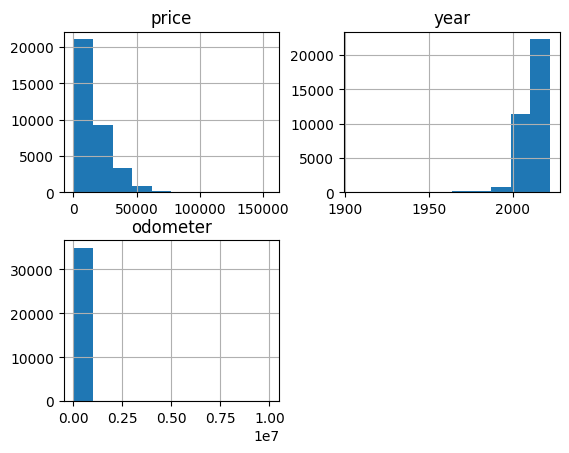

In [15]:
# prompt: drop ID column then create histogram

df = df.drop(columns=['id'])
df.hist()


In [ ]:
# prompt: drop na values
df.dropna(inplace=True)

In [3]:
# prompt: give me a count check for duplicate values

df.duplicated().sum()


NameError: name 'df' is not defined

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.